## Contact map analysis
generate a heatmap for distance between i NH and J CO  (N TO O distance)


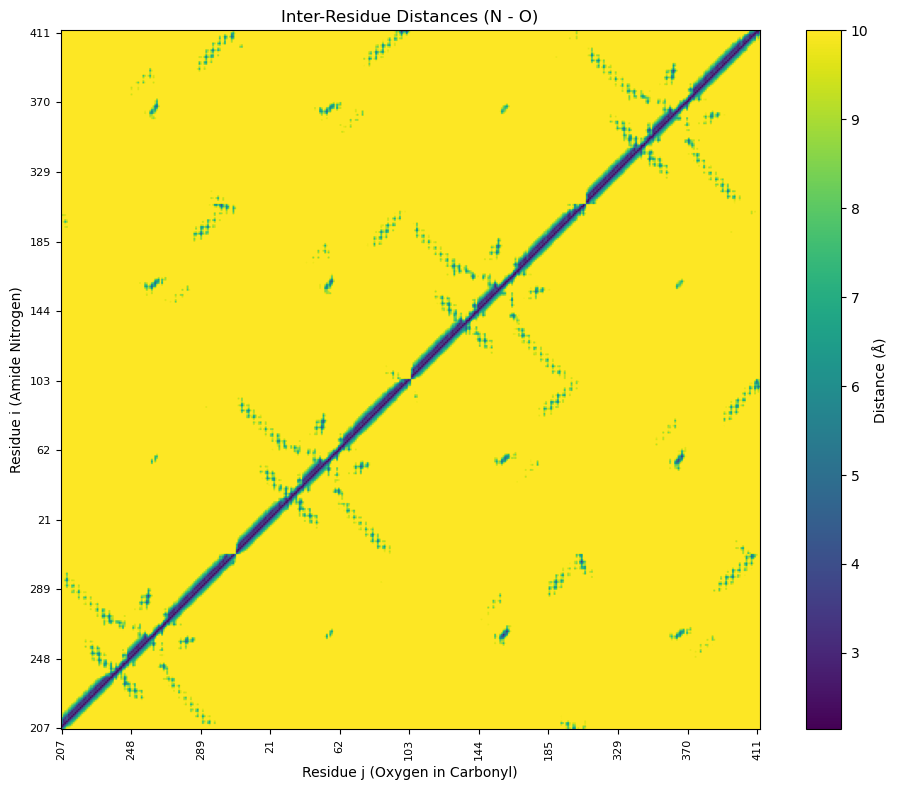

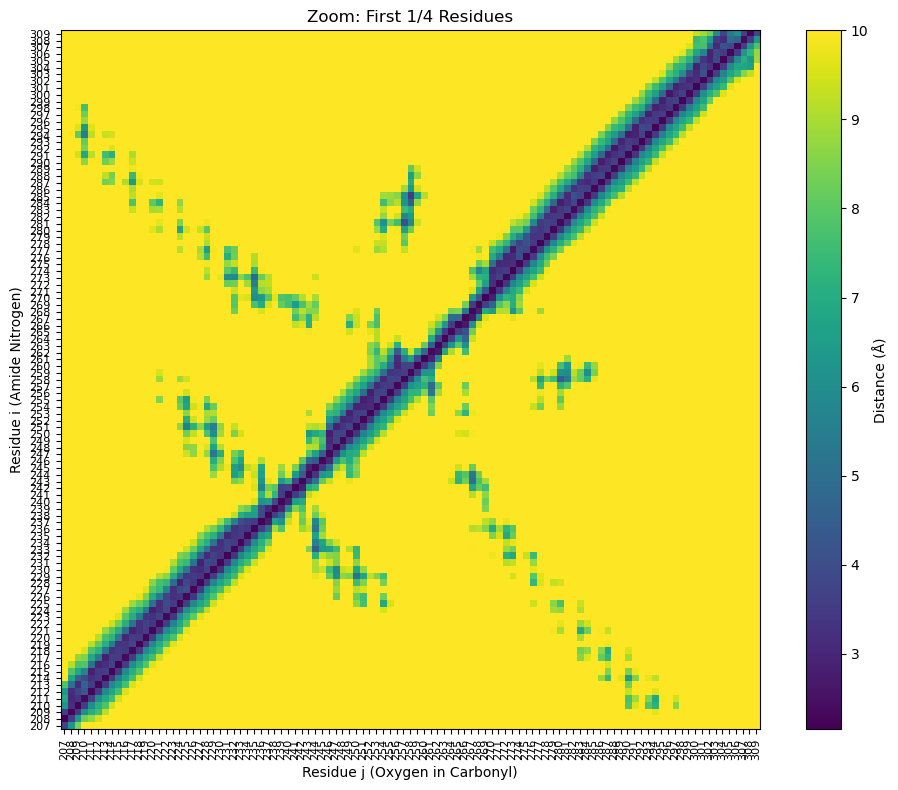

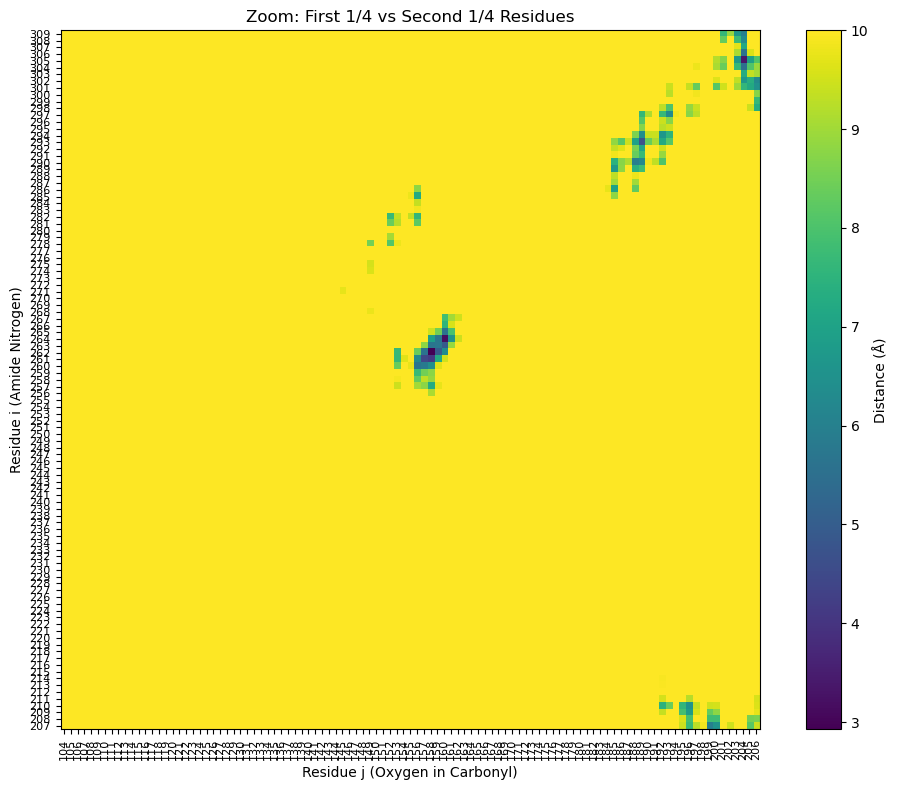

In [6]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance_matrix(u, max_distance=np.inf):
    """Calculate the distance matrix between amide N and carbonyl O atoms, clipping to max_distance."""
    # Select amide N and carbonyl O atoms
    nitrogen_atoms = u.select_atoms("name N")
    oxygen_atoms = u.select_atoms("name O")

    # Initialize distance matrix
    distance_matrix = np.zeros((len(nitrogen_atoms), len(oxygen_atoms)))

    # Calculate distances
    for i, n_atom in enumerate(nitrogen_atoms):
        for j, o_atom in enumerate(oxygen_atoms):
            distance = np.linalg.norm(n_atom.position - o_atom.position)
            distance_matrix[i, j] = min(distance, max_distance)

    return distance_matrix, nitrogen_atoms.resids, oxygen_atoms.resids

def plot_heatmap(distance_matrix, nitrogen_resids, oxygen_resids, title="Inter-Residue Distances (N - O)", zoom_range_i=None, zoom_range_j=None):
    """Plot a heatmap of the distance matrix, optionally zooming into specific ranges."""
    plt.figure(figsize=(10, 8))
    
    if zoom_range_i and zoom_range_j:
        zoomed_matrix = distance_matrix[zoom_range_i[0]:zoom_range_i[1], zoom_range_j[0]:zoom_range_j[1]]
        plt.imshow(zoomed_matrix, cmap="viridis", origin="lower")
        plt.xticks(range(zoom_range_j[1] - zoom_range_j[0]), 
                   oxygen_resids[zoom_range_j[0]:zoom_range_j[1]], rotation=90, fontsize=8)
        plt.yticks(range(zoom_range_i[1] - zoom_range_i[0]), 
                   nitrogen_resids[zoom_range_i[0]:zoom_range_i[1]], fontsize=8)
    else:
        plt.imshow(distance_matrix, cmap="viridis", origin="lower")
        step = max(1, len(oxygen_resids) // 10)
        plt.xticks(range(0, len(oxygen_resids), step), oxygen_resids[::step], rotation=90, fontsize=8)
        plt.yticks(range(0, len(nitrogen_resids), step), nitrogen_resids[::step], fontsize=8)

    plt.colorbar(label="Distance (Å)")
    plt.xlabel("Residue j (Oxygen in Carbonyl)")
    plt.ylabel("Residue i (Amide Nitrogen)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

def main():
    # Load the PDB file
    pdb_file = "/Users/yunyao_1/Dropbox/KcsA/kcsa_1000ns_1125/kcsa_1ms_kwkw.prj/Kcsa_normal_state.pdb" 
    max_distance = 10.0  # Set maximum distance to clip
    u = mda.Universe(pdb_file)

    # Calculate distance matrix
    distance_matrix, nitrogen_resids, oxygen_resids = calculate_distance_matrix(u, max_distance=max_distance)

    # Plot full heatmap
    plot_heatmap(distance_matrix, nitrogen_resids, oxygen_resids)

    # Define zoom ranges
    num_residues = len(nitrogen_resids)
    quarter = num_residues // 4

    # First zoom-in plot: first 1/4 residues themselves
    plot_heatmap(distance_matrix, nitrogen_resids, oxygen_resids, 
                 title="Zoom: First 1/4 Residues", 
                 zoom_range_i=(0, quarter), zoom_range_j=(0, quarter))

    # Second zoom-in plot: first 1/4 vs second 1/4 residues
    plot_heatmap(distance_matrix, nitrogen_resids, oxygen_resids, 
                 title="Zoom: First 1/4 vs Second 1/4 Residues", 
                 zoom_range_i=(0, quarter), zoom_range_j=(2*quarter, 3 * quarter))

if __name__ == "__main__":
    main()
